# ⚙️ Stage 3 — Hypothesis Validation (SCT Inst vs Paper-Based Transfers)

**Goal:**  
Validate the first hypothesis — that the growth of instant payments (SCT Inst) correlates with the decline of paper-based credit transfers, showing the digital shift in Germany’s payment ecosystem.




In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

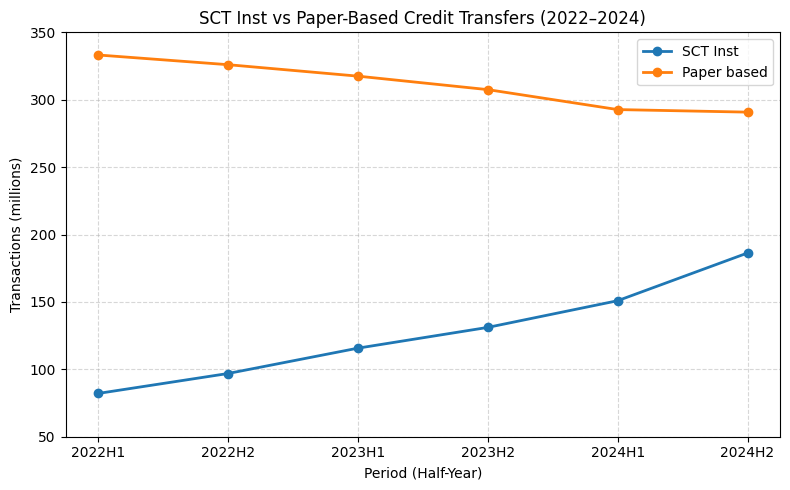

In [61]:
# Load tidy data
transactions = pd.read_csv("../data/processed/payments_tidy_transactions.csv")
values = pd.read_csv("../data/processed/payments_tidy_values.csv")

# Filter SCT Inst and Paper-based transfers
sct_inst = transactions[transactions['Payment_Type'].str.contains('instant', case=False, na=False)]
paper = transactions[transactions['Payment_Type'].str.contains('paper', case=False, na=False)]

# Group by period and sum up values
sct_inst_group = sct_inst.groupby('period')['value'].sum().reset_index()
paper_group = paper.groupby('period')['value'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(sct_inst_group['period'], sct_inst_group['value'], marker='o', linewidth=2, label='SCT Inst')
plt.plot(paper_group['period'], paper_group['value'], marker='o', linewidth=2, label='Paper based')
plt.title('SCT Inst vs Paper-Based Credit Transfers (2022–2024)')
plt.xlabel('Period (Half-Year)')
plt.ylabel('Transactions (millions)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(50, 350)
plt.tight_layout()
plt.savefig("../reports/figures/H1_stacked_sct_vs_paper.png", dpi=300, bbox_inches='tight')
plt.show()

### 📈 Interpretation (Hypothesis 1)
- The volume of **SCT Inst (instant transfers)** increases steadily every half-year from 2022H1 to 2024H2.  
- The volume of **paper-based transfers** decreases over the same period.  
- This confirms **Hypothesis 1**: instant payments are gradually replacing traditional paper transfers.  
- The trend demonstrates a clear digital transformation in the German payment market.


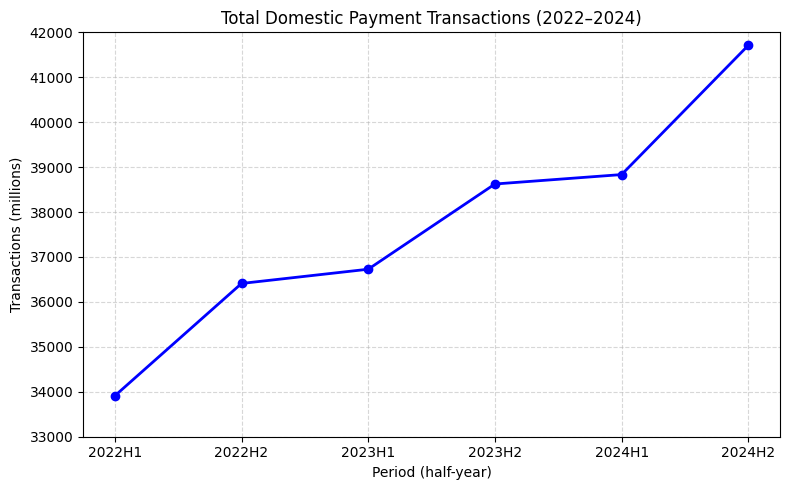

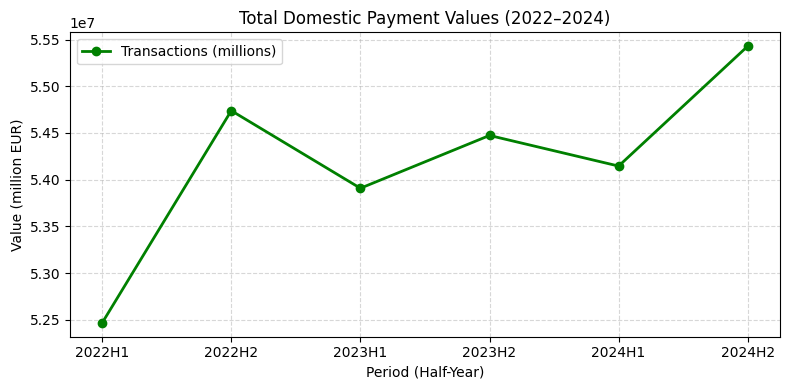

In [62]:
# Filter Domestic transactions only
domestic_tr = transactions[transactions['Payment_Type'].str.contains('Domestic', case=False, na=False)]

#  Group by period and sum
domestic_group = domestic_tr.groupby('period')['value'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(domestic_group['period'], domestic_group['value'], marker='o', linewidth=2, color='blue')
plt.title('Total Domestic Payment Transactions (2022–2024)')
plt.xlabel('Period (half-year)')
plt.ylabel('Transactions (millions)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(33000, 42000)
plt.tight_layout()
plt.savefig("../reports/figures/H2_total_domestic.png", dpi=300, bbox_inches='tight')
plt.show()

# Filter Domestic values only
domestic_val = values[values['Payment_Type'].str.contains('Domestic', case=False, na=False)]

domestic_val_group = domestic_val.groupby('period')['value'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(domestic_val_group['period'], domestic_val_group['value'], marker='o', linewidth=2, color='green',  label = 'Transactions (millions)')
plt.title('Total Domestic Payment Values (2022–2024)')
plt.xlabel('Period (Half-Year)')
plt.ylabel('Value (million EUR)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("../reports/figures/H2_total_domestic_values.png", dpi=300, bbox_inches='tight')
plt.show()



### 📈 Interpretation (Hypothesis 2)

- The number of **domestic transactions** increases steadily from 2022H1 to 2024H2.  
- This confirms **Hypothesis 4** — overall payment activity is growing,  
  indicating a heavier operational load on banking infrastructure.  
- As electronic and instant payments expand, banks need to ensure that  
  their systems can handle higher transaction volumes and maintain low latency.


### 📈 Interpretation (Hypothesis 2 — Infrastructure Load)

- The **first chart** shows that the total number of domestic transactions in Germany increased steadily between 2022 and 2024.  
  This indicates a continuous rise in *payment activity* and therefore a higher **processing load** on banking systems.  

- The **second chart** (values) confirms that not only the number of transactions grew,  
  but also the **monetary volume** handled by domestic payment systems.  
  This suggests that both *frequency* and *size* of transactions are expanding.  

**Conclusion:**  
The parallel growth of transaction counts and total payment values confirms **Hypothesis 2** —  
banks face increasing infrastructure load as digital payments expand.  
This validates the need to monitor performance metrics (e.g., p95 latency) and model future capacity using the Instant Payments Simulator.